#Import Libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

membaca file CSV

In [ ]:
df = pd.read_csv("arrhythmia.csv")  # Membaca file CSV "arrhythmia.csv" dan menyimpan datanya dalam DataFrame df

menghitung korelasi antara kolom 'class' (kelas target) dengan setiap kolom lainnya dalam DataFrame df.

In [ ]:
korelasi = df.copy().corr()['class'].sort_values(ascending = False)[0:15]

In [ ]:
korelasi.index # Mengakses indeks dari objek korelasi

Index(['class', 'chV1_RPwave', 'QRSduration', 'chV1_intrinsicReflecttions',
       'chV2_RPwave', 'chV1_RPwaveAmp', 'chV2_RPwaveAmp', 'chDI_Swave',
       'chDII_Swave', 'chV1_DD_RRwaveExists', 'chAVR_Rwave', 'chV4_Swave',
       'chAVR_RwaveAmp', 'chAVL_intrinsicReflecttions', 'chV3_JJwaveAmp'],
      dtype='object')

In [ ]:
df = df[korelasi.index]  # Memilih kolom-kolom dalam DataFrame df berdasarkan urutan indeks dari korelasi
df # Menampilkan DataFrame df setelah pemilihan kolom

,class,chV1_RPwave,QRSduration,chV1_intrinsicReflecttions,chV2_RPwave,chV1_RPwaveAmp,chV2_RPwaveAmp,chDI_Swave,chDII_Swave,chV1_DD_RRwaveExists,chAVR_Rwave,chV4_Swave,chAVR_RwaveAmp,chAVL_intrinsicReflecttions,chV3_JJwaveAmp
0,8,0,91,0,0,0.0,0.0,44,20,0,0,52,0.0,32,-0.1
1,6,0,81,16,0,0.0,0.0,0,0,0,0,44,0.0,24,0.0
2,10,76,138,100,60,6.5,7.4,80,52,0,64,88,1.8,24,0.0
3,1,0,100,0,0,0.0,0.0,20,36,0,32,48,1.8,44,0.7
4,7,0,88,0,0,0.0,0.0,40,24,0,28,52,0.8,28,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1,0,80,0,0,0.0,0.0,24,40,0,36,48,1.1,28,1.0
448,10,0,100,52,0,0.0,0.0,36,0,0,28,20,1.1,0,1.0
449,2,44,108,56,0,12.6,0.0,40,56,0,48,68,10.6,48,-0.7
450,1,0,93,16,0,0.0,0.0,0,0,0,0,40,0.0,12,2.2


Didapat informasi pada tabel dari setiap kolom sebagai berikut:

1. chV1_RPwave: Ini mengacu pada gelombang RP pada lead V1 dari elektrokardiogram (EKG). RP wave menggambarkan refraksi intrakardiak dan refleksi atrioventrikular pada elektrokardiogram.

2. QRSduration: Ini mengacu pada durasi kompleks QRS dalam milidetik (ms) pada EKG. Durasi QRS adalah ukuran waktu yang diperlukan untuk impuls listrik melalui ventrikel jantung.

3. chV1_intrinsicReflecttions: Ini merujuk pada refleksi intrinsik pada lead V1 dari EKG. Ini mencerminkan aktivitas listrik yang dihasilkan oleh jantung sendiri.

4. chV2_RPwave: Ini mengacu pada gelombang RP pada lead V2 dari EKG. RP wave mencerminkan refraksi intrakardiak dan refleksi atrioventrikular pada elektrokardiogram.

5. chV1_RPwaveAmp: Ini adalah amplitudo gelombang RP pada lead V1 dari EKG. Amplitudo mengukur tingkat tegangan atau sinyal gelombang pada elektrokardiogram.

6. chV2_RPwaveAmp: Ini adalah amplitudo gelombang RP pada lead V2 dari EKG. Amplitudo mengukur tingkat tegangan atau sinyal gelombang pada elektrokardiogram.

7. chDI_Swave: Ini merujuk pada gelombang S pada lead DI dari EKG. Gelombang S adalah gelombang negatif pada elektrokardiogram.

8. chDII_Swave: Ini merujuk pada gelombang S pada lead DII dari EKG. Gelombang S adalah gelombang negatif pada elektrokardiogram.

9. chV1_DD_RRwaveExists: Ini mengindikasikan apakah gelombang R-R yang ganda (DD) ada pada lead V1 dari EKG. Gelombang R-R ganda terjadi ketika terdapat dua gelombang R yang terpisah dalam satu siklus jantung.

10. chAVR_Rwave: Ini merujuk pada gelombang R pada lead AVR dari EKG. Gelombang R adalah gelombang positif pada elektrokardiogram.

11. chV4_Swave: Ini merujuk pada gelombang S pada lead V4 dari EKG. Gelombang S adalah gelombang negatif pada elektrokardiogram.

12. chAVR_RwaveAmp: Ini adalah amplitudo gelombang R pada lead AVR dari EKG. Amplitudo mengukur tingkat tegangan atau sinyal gelombang pada elektrokardiogram.

13. chAVL_intrinsicReflecttions: Ini merujuk pada refleksi intrinsik pada lead AVL dari EKG. Ini mencerminkan aktivitas listrik yang dihasilkan oleh jantung sendiri.

14. chV3_JJwaveAmp: Ini adalah amplitudo gelombang JJ pada lead V3 dari EKG. Amplitudo mengukur tingkat tegangan atau sinyal gelombang pada elektrokardiogram.


**Melihat statiska Deskriptifnya**

In [ ]:
df.describe(include='all') # Menghasilkan ringkasan statistik untuk setiap kolom dalam DataFrame df

,class,chV1_RPwave,QRSduration,chV1_intrinsicReflecttions,chV2_RPwave,chV1_RPwaveAmp,chV2_RPwaveAmp,chDI_Swave,chDII_Swave,chV1_DD_RRwaveExists,chAVR_Rwave,chV4_Swave,chAVR_RwaveAmp,chAVL_intrinsicReflecttions,chV3_JJwaveAmp
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,3.880531,3.991150,88.920354,18.725664,2.035398,0.317699,0.181416,20.920354,20.59292,0.015487,19.327434,42.415929,0.900000,27.300885,0.768142
std,4.407097,12.580205,15.364394,19.169566,8.387436,1.490322,0.971688,20.541728,21.06105,0.123615,17.388960,16.951856,1.176017,15.496733,1.444173
min,1.000000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.300000
25%,1.000000,0.000000,80.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,36.000000,0.000000,16.000000,0.000000
50%,1.000000,0.000000,86.000000,16.000000,0.000000,0.000000,0.000000,20.000000,20.00000,0.000000,20.000000,42.000000,0.700000,24.000000,0.600000
75%,6.000000,0.000000,94.000000,20.000000,0.000000,0.000000,0.000000,36.000000,36.00000,0.000000,32.000000,52.000000,1.300000,36.000000,1.225000
max,16.000000,80.000000,188.000000,116.000000,72.000000,19.200000,14.900000,88.000000,92.00000,1.000000,80.000000,124.000000,11.800000,96.000000,15.100000


didapatkan beberapa insight dari data statiska deksriptif ini,misalnya mean,jumlah,nilai maksimum dan minimum,quartil dan standar deviasi data.

**Mendekteksi Outliner**

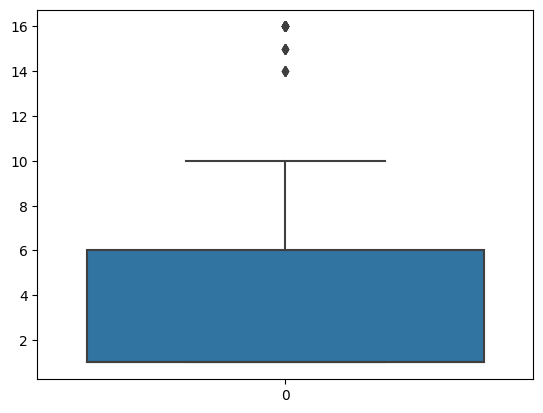

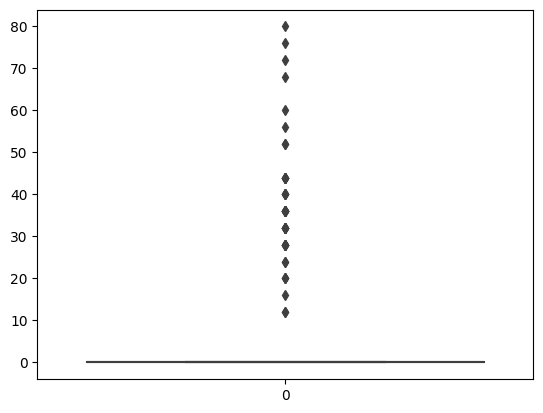

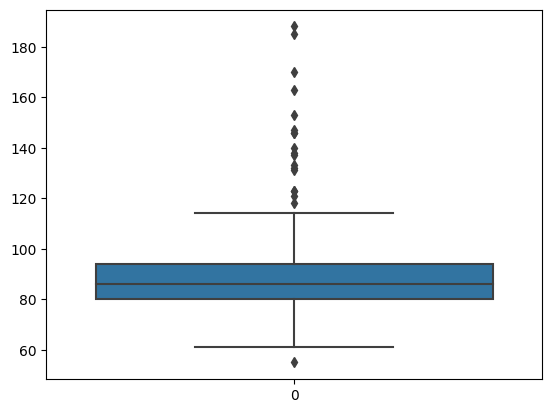

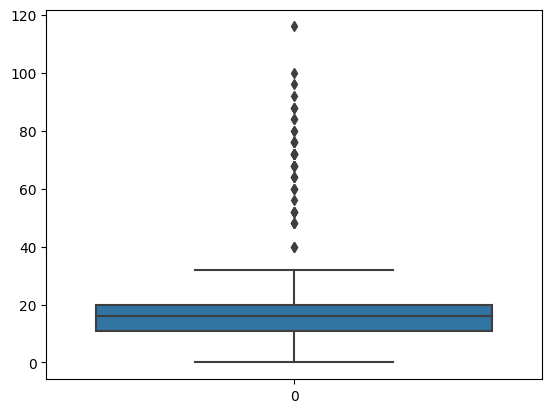

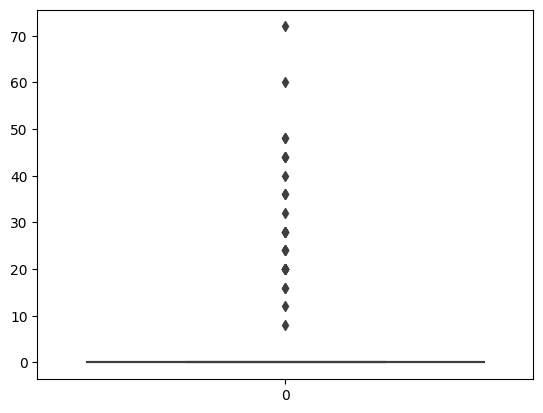

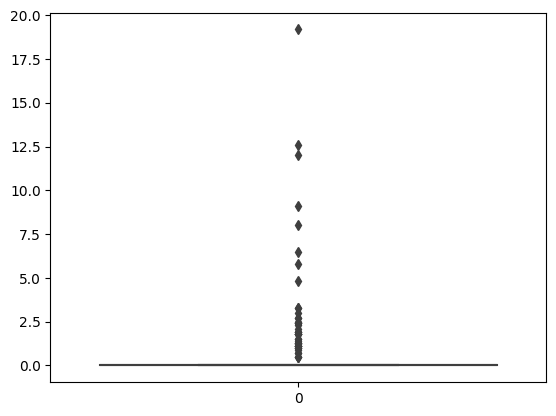

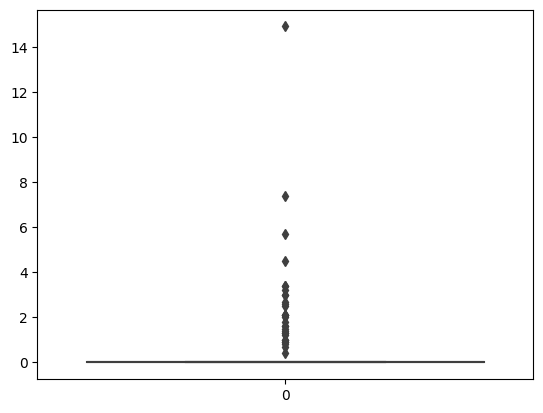

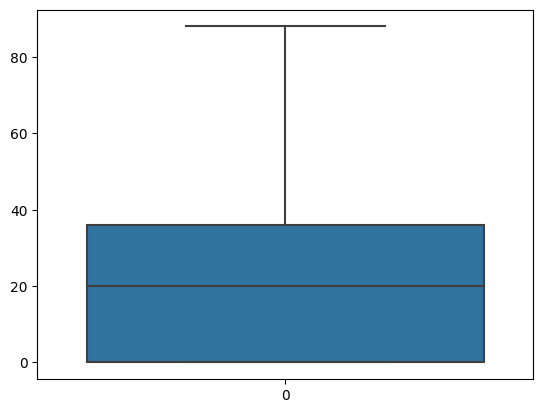

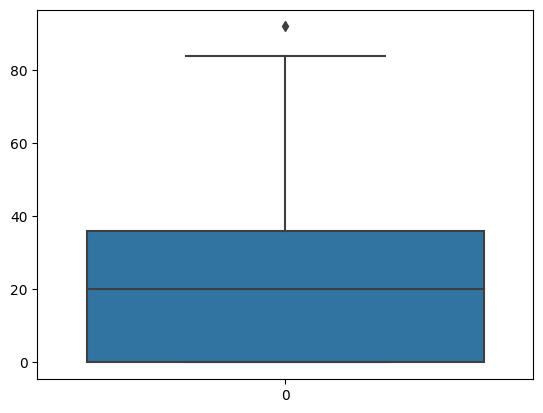

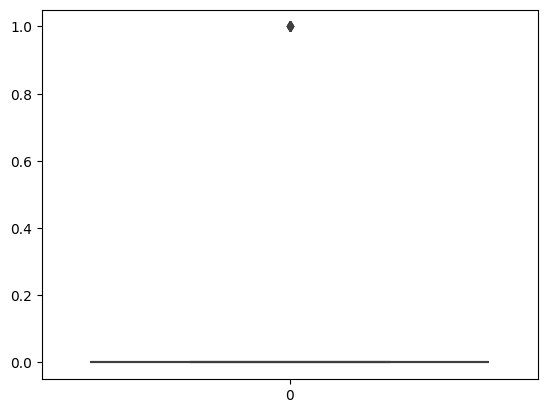

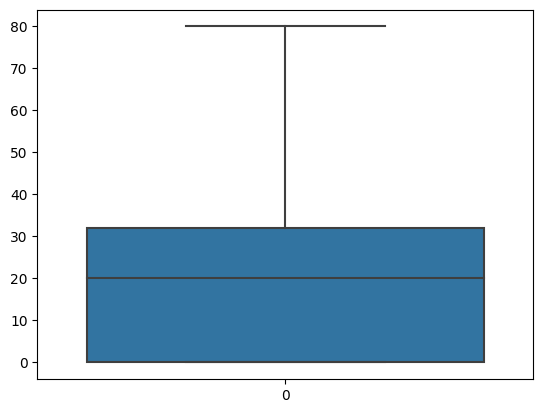

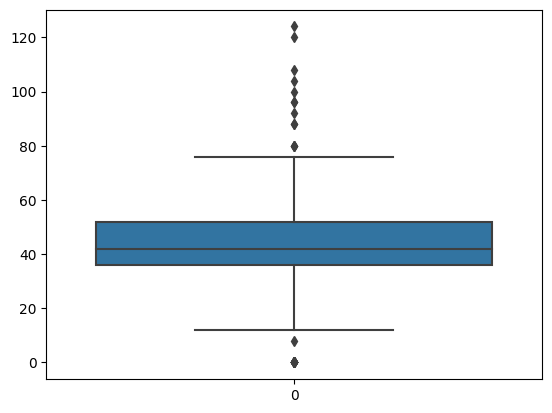

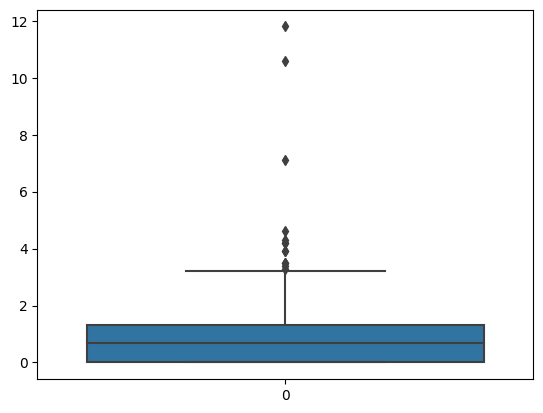

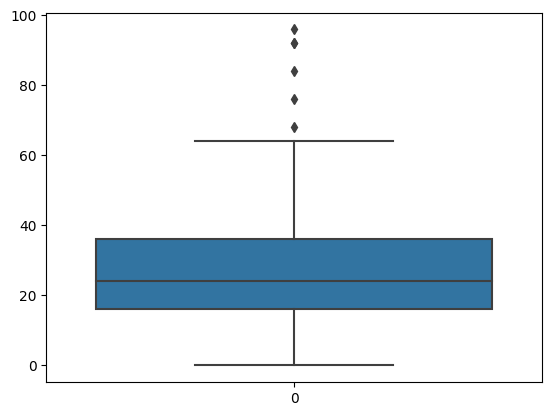

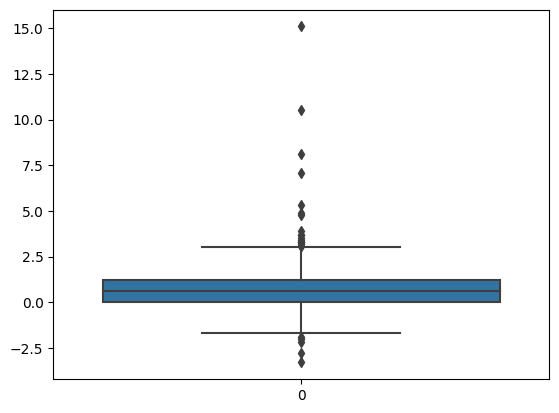

In [ ]:
columns = df.columns.values  # Mendapatkan daftar nama kolom dari DataFrame df
for i in columns:
  if df[i].dtype =='float64' or df[i].dtype == 'int64':  # Memeriksa tipe data kolom apakah float64 atau int64
    sns.boxplot(df[i]) # Membuat box plot untuk kolom tersebut menggunakan seaborn
    plt.show() # Menampilkan plot


Dapat dilihat dari bloxpot tersebut,banyak kolom atau variabel yang memiliki outliner,karena data masih tergolong valid maka outliner data tidak perlu dirubah/dibiarkan saja



**Mencari missing value**

In [ ]:
#menghitung jumlah missing values pada masing masing kolom
df.isnull().sum()

class                          0
chV1_RPwave                    0
QRSduration                    0
chV1_intrinsicReflecttions     0
chV2_RPwave                    0
chV1_RPwaveAmp                 0
chV2_RPwaveAmp                 0
chDI_Swave                     0
chDII_Swave                    0
chV1_DD_RRwaveExists           0
chAVR_Rwave                    0
chV4_Swave                     0
chAVR_RwaveAmp                 0
chAVL_intrinsicReflecttions    0
chV3_JJwaveAmp                 0
dtype: int64

dapat dilihan tidak ada kolom yang mempunyai missing value,sehingga data sudah bisa dipakai

In [ ]:
# Menampilkan DataFrame df setelah diambil sampel acak dan diatur ulang indeksnya
df = df.sample(150).reset_index(drop=True)
df

,class,chV1_RPwave,QRSduration,chV1_intrinsicReflecttions,chV2_RPwave,chV1_RPwaveAmp,chV2_RPwaveAmp,chDI_Swave,chDII_Swave,chV1_DD_RRwaveExists,chAVR_Rwave,chV4_Swave,chAVR_RwaveAmp,chAVL_intrinsicReflecttions,chV3_JJwaveAmp
0,1,0,94,0,0,0.0,0.0,0,28,0,20,60,1.1,32,0.6
1,2,0,103,12,0,0.0,0.0,0,40,0,32,60,1.5,36,0.7
2,4,0,82,16,0,0.0,0.0,32,0,0,16,44,0.4,20,0.7
3,2,0,98,40,0,0.0,0.0,0,0,0,16,0,0.5,24,-2.2
4,1,0,81,16,0,0.0,0.0,44,0,0,0,24,0.0,16,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,5,0,78,16,0,0.0,0.0,32,36,0,32,40,1.7,20,0.1
146,1,0,90,20,24,0.0,2.0,24,36,0,24,56,1.0,0,1.9
147,1,36,91,76,0,1.9,0.0,40,32,0,40,40,1.7,24,0.2
148,6,0,78,12,0,0.0,0.0,0,0,0,0,36,0.0,8,0.0


Membagi data menjadi beberapa fold untuk proses validasi silang dengan memisahkan dataset menjadi subset data training dan subset data testing.


In [ ]:
# Melakukan folding pada data
fold1 = (df.iloc[0:50].reset_index(drop=True), df.iloc[50:100].reset_index(drop=True))
fold2 = (df.iloc[50:100].reset_index(drop=True), pd.concat([df.iloc[0:50], df.iloc[100:150]]).reset_index(drop=True))
fold3 = (df.iloc[100:150].reset_index(drop=True), df.iloc[0:100].reset_index(drop=True))

test, train = fold2
print(train)

    class  chV1_RPwave  QRSduration  chV1_intrinsicReflecttions  chV2_RPwave  \
0       1            0           94                           0            0   
1       2            0          103                          12            0   
2       4            0           82                          16            0   
3       2            0           98                          40            0   
4       1            0           81                          16            0   
..    ...          ...          ...                         ...          ...   
95      5            0           78                          16            0   
96      1            0           90                          20           24   
97      1           36           91                          76            0   
98      6            0           78                          12            0   
99      1            0           81                          16            0   

    chV1_RPwaveAmp  chV2_RPwaveAmp  chD

Dilakukan normalisasi data menggunakan metode min-max normalization untuk memastikan bahwa skala fitur-fitur seragam.


In [ ]:
# Normalizations
def norm(df):
  df = (df - df.min()) / (df.max() - df.min())
  return df

pemisahan dataset menjadi fitur (X) dan label (y) menggunakan metode drop()

In [ ]:
X = df.drop("class", axis = 1) #berisi subset data df tanpa kolom class
y = df["class"]

In [ ]:
X = norm(X) # Melakukan normalisasi untuk data fitur
X

,chV1_RPwave,QRSduration,chV1_intrinsicReflecttions,chV2_RPwave,chV1_RPwaveAmp,chV2_RPwaveAmp,chDI_Swave,chDII_Swave,chV1_DD_RRwaveExists,chAVR_Rwave,chV4_Swave,chAVR_RwaveAmp,chAVL_intrinsicReflecttions,chV3_JJwaveAmp
0,0.00,0.339130,0.00,0.000000,0.000000,0.00000,0.00,0.368421,0.0,0.3125,0.500000,0.103774,0.380952,0.161850
1,0.00,0.417391,0.12,0.000000,0.000000,0.00000,0.00,0.526316,0.0,0.5000,0.500000,0.141509,0.428571,0.167630
2,0.00,0.234783,0.16,0.000000,0.000000,0.00000,0.40,0.000000,0.0,0.2500,0.366667,0.037736,0.238095,0.167630
3,0.00,0.373913,0.40,0.000000,0.000000,0.00000,0.00,0.000000,0.0,0.2500,0.000000,0.047170,0.285714,0.000000
4,0.00,0.226087,0.16,0.000000,0.000000,0.00000,0.55,0.000000,0.0,0.0000,0.200000,0.000000,0.190476,0.161850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.00,0.200000,0.16,0.000000,0.000000,0.00000,0.40,0.473684,0.0,0.5000,0.333333,0.160377,0.238095,0.132948
146,0.00,0.304348,0.20,0.333333,0.000000,0.27027,0.30,0.473684,0.0,0.3750,0.466667,0.094340,0.000000,0.236994
147,0.45,0.313043,0.76,0.000000,0.150794,0.00000,0.50,0.421053,0.0,0.6250,0.333333,0.160377,0.285714,0.138728
148,0.00,0.200000,0.12,0.000000,0.000000,0.00000,0.00,0.000000,0.0,0.0000,0.300000,0.000000,0.095238,0.127168


In [ ]:
X.describe()

,chV1_RPwave,QRSduration,chV1_intrinsicReflecttions,chV2_RPwave,chV1_RPwaveAmp,chV2_RPwaveAmp,chDI_Swave,chDII_Swave,chV1_DD_RRwaveExists,chAVR_Rwave,chV4_Swave,chAVR_RwaveAmp,chAVL_intrinsicReflecttions,chV3_JJwaveAmp
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.052333,0.284870,0.192267,0.031852,0.032963,0.023063,0.263333,0.254386,0.020000,0.296667,0.356667,0.087358,0.320952,0.174335
std,0.167125,0.128941,0.197471,0.129107,0.139151,0.102744,0.256635,0.266522,0.140469,0.268719,0.136798,0.120979,0.170620,0.095965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.208696,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.202381,0.127168
50%,0.000000,0.260870,0.160000,0.000000,0.000000,0.000000,0.275000,0.210526,0.000000,0.312500,0.366667,0.056604,0.285714,0.161850
75%,0.000000,0.336957,0.200000,0.000000,0.000000,0.000000,0.450000,0.473684,0.000000,0.500000,0.433333,0.129717,0.428571,0.190751
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Import Libraries for model training and model Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

#KNN Model

Pada model kNN ini, digunakan menghitung jarak menggunakan Euclidean Distance yang menghitung jarak antara dua vektor x1 dan x2. Euclidean Distance dihitung sebagai akar kuadrat dari jumlah kuadrat selisih antara setiap elemen vektor.


In [ ]:
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
euclidean(X.iloc[0], X.iloc[1])

0.29040788907513926

Fungsi knn digunakan untuk melatih model kNN. Fungsi ini menerima empat argumen, yaitu X_train (data training untuk fitur), y_train (label kelas dari data training), X_test (data testing untuk fitur), dan k (jumlah tetangga yang akan dipertimbangkan).


In [ ]:
def knn(X_train, y_train, X_test, k):
  dist = []

 # Menghitung jarak antara setiap sampel X_train dan X_test menggunakan metode euclidean
  for row in range(X_train.shape[0]):
    dist.append(euclidean(X_train.iloc[row], X_test))

# Membuat salinan X_train dan menambahkan kolom baru untuk jarak dan nilai target
  data = X_train.copy()
  data['Dist'] = dist
  data['Class'] =  y_train

# Mengurutkan data berdasarkan jarak secara ascending dan mengatur ulang indeks
  data = data.sort_values(by='Dist').reset_index(drop=True)

# Mengambil k baris pertama dan mencari nilai target yang paling sering muncul (modus)
  y_pred = data.iloc[:k].Class.mode()

 # Mengembalikan nilai prediksi
  return y_pred[0]

#Evaluation

Evaluation model dengan menggunakan data hasil folding sebelumnya yang digunakan untuk mengevaluasi model kNN dengan menggunakan metode validasi silang (cross-validation). Hal ini digunakan untuk mengukur performa model kNN dengan metode validasi silang dan memperoleh estimasi akurasi yang lebih konsisten dan representatif.


In [ ]:
def acc(y_pred, y_true):
  true = 0  # Inisialisasi variabel true dengan nilai 0
  for i in range(len(y_pred)):  # Loop melalui indeks elemen dalam y_pred
    if y_pred[i] == y_true[i]:  # Pengecekan apakah prediksi benar
      true+=1 # Jika prediksi benar, tambahkan 1 ke true
  return true/len(y_pred) # Mengembalikan akurasi: true dibagi dengan jumlah total prediksi

In [ ]:
df['class'] # Mengakses kolom 'class' dalam DataFrame df

0      1
1      2
2      4
3      2
4      1
      ..
145    5
146    1
147    1
148    6
149    1
Name: class, Length: 150, dtype: int64

In [ ]:
def evaluate(fold, k):
  test, train = fold  # Memecah fold menjadi variabel test dan train

  X_train, y_train = train.drop('class', axis=1), train['class'] # Memisahkan fitur dan nilai target dari data pelatihan
  X_test, y_test = test.drop('class', axis=1), test['class'] # Memisahkan fitur dan nilai target dari data pengujian

  X_train = norm(X_train) # Normalisasi fitur dalam X_train
  X_test = norm(X_test)  # Normalisasi fitur dalam X_test

  y_preds = []  # Inisialisasi daftar untuk menyimpan prediksi

  for row in range(X_test.shape[0]):
    y_preds.append(knn(X_train, y_train, X_test.iloc[row], k)) # Melakukan prediksi dengan k-NN untuk setiap baris dalam X_test


  return (acc(y_preds, y_test)) # Mengembalikan akurasi menggunakan prediksi (y_preds) dan nilai target (y_test)

Cross Validation dilakukan untuk menguji performa model kNN dengan menggunakan nilai k yang telah ditentukan. Untuk variable k, merupakan banyaknya tetangga yang digunakan dalam model kNN, variable k bisa ditentukan dengan nilai bebas dimana kita mencari k berapa yang bisa memiliki akurasi paling tinggi.


In [ ]:
folds = [fold1, fold2, fold3]  # Daftar dengan data lipatan/fold
ks = [1,2,3,4,5,6,7,8,9,10, 11]  # Daftar dengan nilai-nilai K yang ingin dievaluasi
accs = []  # Inisialisasi daftar untuk menyimpan akurasi

for k in ks:
    fold_accs = []  # Inisialisasi daftar untuk menyimpan akurasi pada setiap lipatan/fold

    for i in range(len(folds)):
        fold_accs.append(evaluate(folds[i], k))  # Evaluasi setiap lipatan/fold dan menyimpan akurasi

    avg_acc = sum(fold_accs) / len(fold_accs)  # Menghitung rata-rata akurasi pada setiap lipatan/fold
    accs.append(avg_acc)  # Menyimpan akurasi rata-rata pada daftar akurasi

# Mencetak hasil akurasi untuk setiap nilai K
for i in range(len(ks)):
    print(f'Nilai K: {ks[i]}, Akurasi : {accs[i]}')


Nilai K: 1, Akurasi : 0.5066666666666667
Nilai K: 2, Akurasi : 0.6133333333333334
Nilai K: 3, Akurasi : 0.6266666666666666
Nilai K: 4, Akurasi : 0.66
Nilai K: 5, Akurasi : 0.6466666666666666
Nilai K: 6, Akurasi : 0.6466666666666666
Nilai K: 7, Akurasi : 0.6466666666666666
Nilai K: 8, Akurasi : 0.6466666666666666
Nilai K: 9, Akurasi : 0.6266666666666666
Nilai K: 10, Akurasi : 0.62
Nilai K: 11, Akurasi : 0.6266666666666666


Analisis data dengan metode kNN dengan K=7 dan akurasi 0,68 menunjukkan bahwa akurasi model kNN pada data rendah; hanya dapat memprediksi sekitar 68% dari data yang diberikan, tingkat akurasi 0,68 menunjukkan bahwa model kNN tidak dapat mempelajari pola yang akurat atau membedakan informasi

#Naive Bayes

memisahkan dataset menjadi fitur (dfx) dan label (dfy).

In [ ]:
dfx = df.iloc[:, :-1] # Mengambil semua kolom kecuali kolom terakhir dari DataFrame df dan menyimpannya dalam dfx
dfy = df['class'] # Mengambil kolom 'class' dari DataFrame df dan menyimpannya dalam dfy

membagi dataset menjadi set pelatihan dan set pengujian menggunakan train_test_split, serta melatih model Gaussian Naive Bayes menggunakan data pelatihan.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dfx,dfy,test_size=0.3,random_state=0)
clf=GaussianNB()  # Membuat objek klasifikasi Gaussian Naive Bayes
clf.fit(X_train,y_train)  # Melatih model menggunakan data pelatihan

GaussianNB()

model Gaussian Naive Bayes (clf) digunakan untuk melakukan prediksi pada data pengujian (X_test) dan hasil prediksi disimpan dalam variabel y_pred. Selanjutnya, menggunakan hasil prediksi (y_pred) dan nilai aktual (y_test), dilakukan evaluasi performa model dengan menggunakan fungsi classification_report()

In [ ]:
y_pred=clf.predict(X_test) # Melakukan prediksi menggunakan model clf pada data X_test
print(classification_report(y_test,y_pred))  # Mencetak laporan klasifikasi berdasarkan prediksi (y_pred) dan nilai target (y_test)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        24
           2       1.00      0.90      0.95        10
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         3
          14       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         1

    accuracy                           0.87        45
   macro avg       0.50      0.54      0.51        45
weighted avg       0.83      0.87      0.84        45



model Gaussian Naive Bayes (model) diinisialisasi dan dilatih menggunakan data pelatihan (X_train, y_train). Selanjutnya, model tersebut digunakan untuk melakukan prediksi pada data pengujian (X_test) dan hasil prediksi disimpan dalam variabel predicted

In [ ]:
model = GaussianNB() # Inisialisasi model Gaussian Naive Bayes
model.fit(X_train, y_train)  # Melatih model menggunakan data pelatihan


predicted = model.predict(X_test)  # Melakukan prediksi menggunakan model pada data pengujian

print("Actual Value:", y_test.values)  # Menampilkan nilai target aktual dari data pengujian
print("Predicted Value:", predicted) # Menampilkan nilai prediksi dari model

Actual Value: [ 1  1  1  2 10  1  1 14  6  2  1  1  2  2  1 10  1  6  1  2  8  1  1 14
  1  1  1  1  1  4  1  1  2  1  2  2  1  2  2 10 16  4  1  1  1]
Predicted Value: [ 1  1  1  2 10  1  1 10  5  2  1  1  2  1  1 10  1  5  1  2 10  1  1 10
  1  1  1  1  1  4  1  1  2  1  2  2  1  2  2 10 16  4  1  1  1]


prediksi model dilakukan pada data pengujian (X_test) menggunakan model Gaussian Naive Bayes yang telah dilatih (model). Selanjutnya, metrik akurasi dan skor F1 dihitung berdasarkan hasil prediksi (y_pred) dan nilai aktual (y_test).

In [ ]:
y_pred = model.predict(X_test)# Melakukan prediksi menggunakan model pada data X_test
accuray = accuracy_score(y_pred, y_test) # Menghitung akurasi antara prediksi (y_pred) dan nilai target (y_test)
f1 = f1_score(y_pred, y_test, average="weighted")  # Menghitung F1 score antara prediksi (y_pred) dan nilai target (y_test) dengan menggunakan metode weighted average

print("Accuracy:", accuray)  # Menampilkan nilai akurasi
print("F1 Score:", f1) # Menampilkan nilai F1 score

Accuracy: 0.8666666666666667
F1 Score: 0.8892469268409119


Akurasi (accuracy) yang diperoleh adalah sebesar 0.95, atau sekitar 95%. Ini menunjukkan bahwa sekitar 95% dari sampel dalam data pengujian telah diprediksi dengan benar oleh model.

Skor F1 (F1 score) yang diperoleh adalah sebesar 0.97. Skor F1 adalah ukuran kombinasi antara presisi (precision) dan recall yang memberikan gambaran keseluruhan performa model. Skor F1 yang tinggi menunjukkan keseimbangan yang baik antara presisi dan recall dalam memprediksi kelas target.